In [1]:
import numpy as np
import os
from skimage.io import imread, imsave
from skimage.color import rgb2hsv
import imgaug as ia
from imgaug import augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
import glob
from PIL import Image, ImageFont, ImageDraw, ImageEnhance, ImageOps
import requests
from io import BytesIO
import matplotlib.pyplot as plt

./malaria/images/train\pf-train-0000000001.jpg


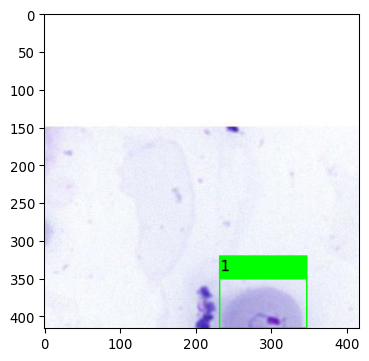

./malaria/images/train\pf-train-0000000002.jpg


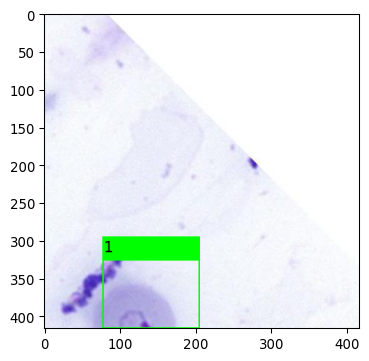

./malaria/images/train\pf-train-0000000003.jpg


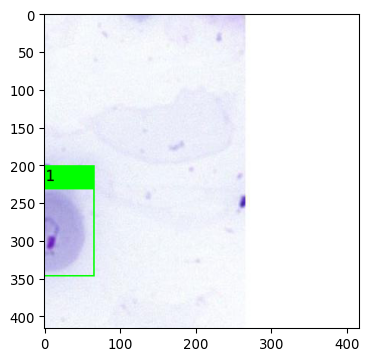

./malaria/images/train\pf-train-0000000004.jpg


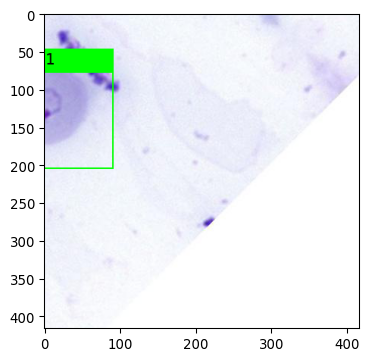

./malaria/images/train\pf-train-0000000005.jpg


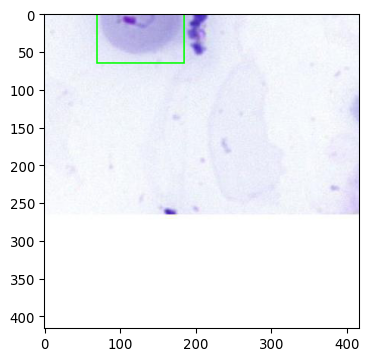

./malaria/images/train\pf-train-0000000006.jpg


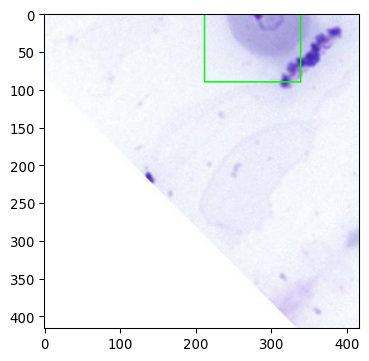

./malaria/images/train\pf-train-0000000007.jpg


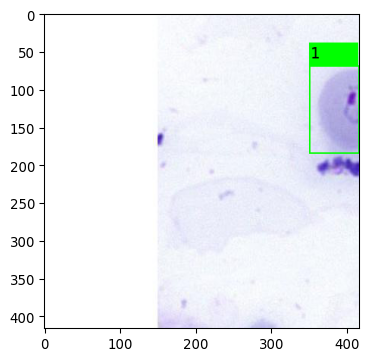

./malaria/images/train\pf-train-0000000008.jpg


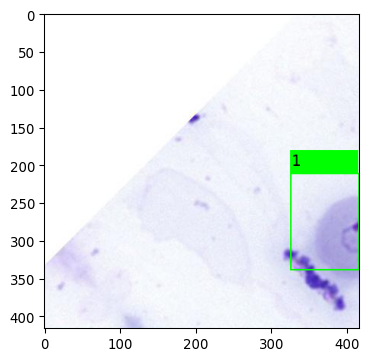

./malaria/images/train\pf-train-0000000009.jpg


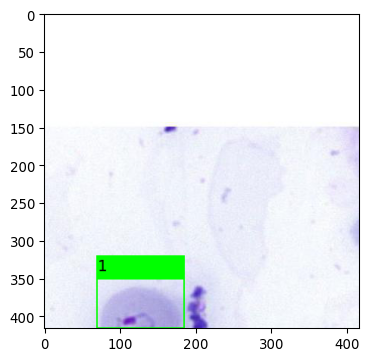

./malaria/images/train\pf-train-0000000010.jpg


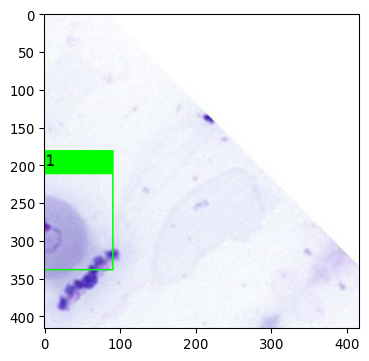

./malaria/images/train\pf-train-0000000011.jpg


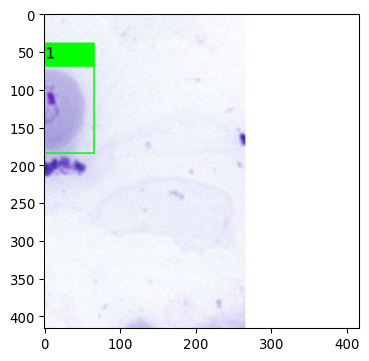

./malaria/images/train\pf-train-0000000012.jpg


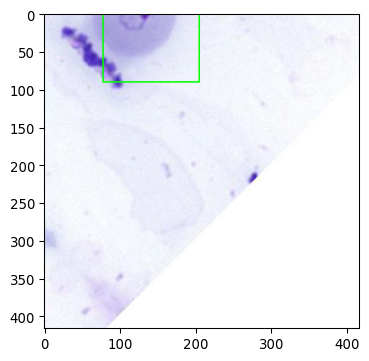

./malaria/images/train\pf-train-0000000013.jpg


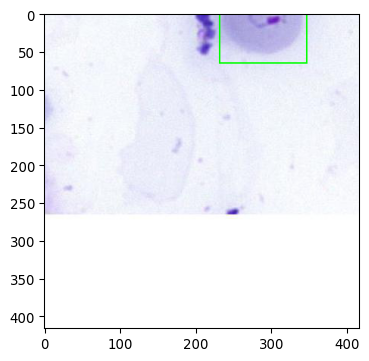

./malaria/images/train\pf-train-0000000014.jpg


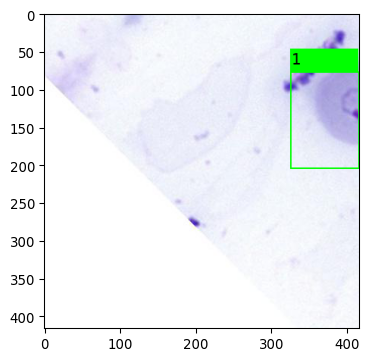

./malaria/images/train\pf-train-0000000015.jpg


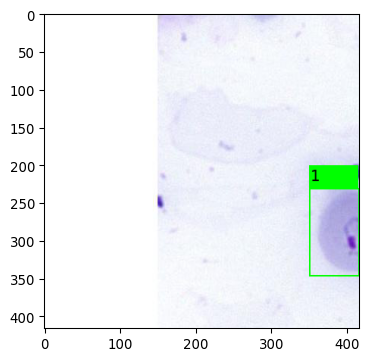

./malaria/images/train\pf-train-0000000016.jpg


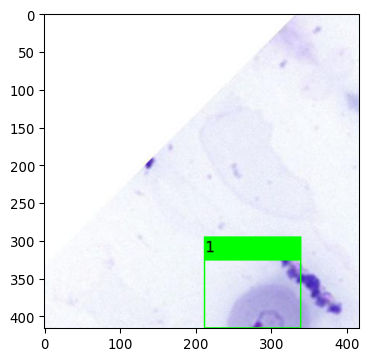

./malaria/images/train\pf-train-0000000017.jpg


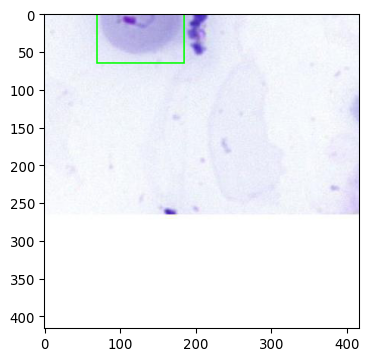

./malaria/images/train\pf-train-0000000018.jpg


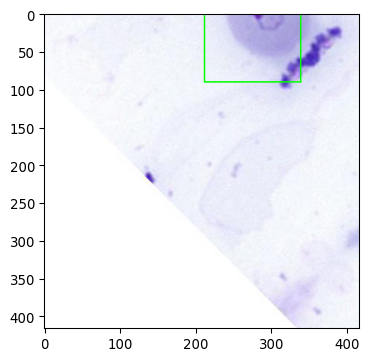

./malaria/images/train\pf-train-0000000019.jpg


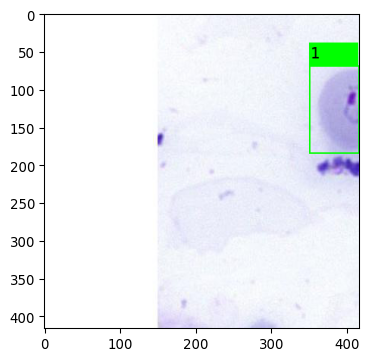

./malaria/images/train\pf-train-0000000020.jpg


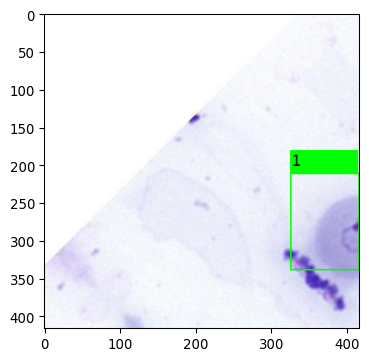

./malaria/images/train\pf-train-0000000021.jpg


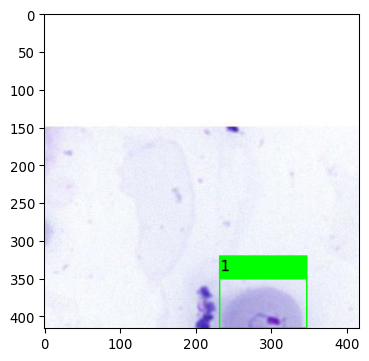

./malaria/images/train\pf-train-0000000022.jpg


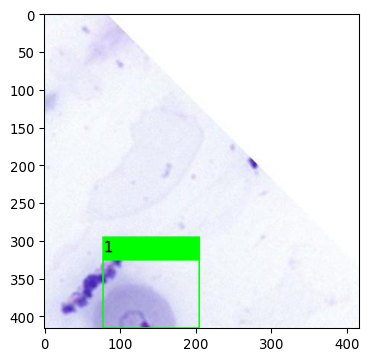

./malaria/images/train\pf-train-0000000023.jpg


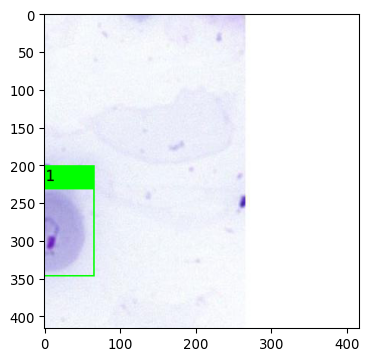

./malaria/images/train\pf-train-0000000024.jpg


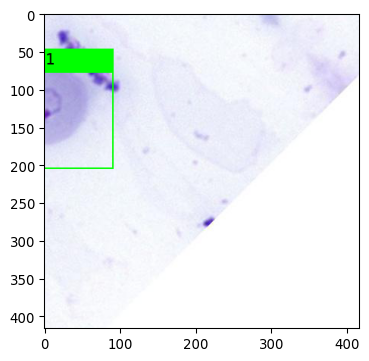

./malaria/images/train\pf-train-0000000025.jpg


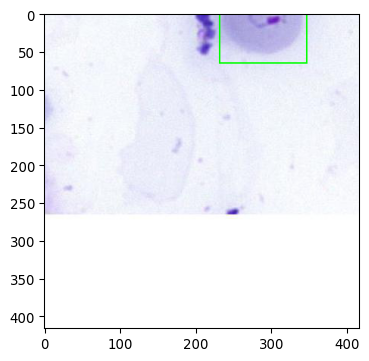

./malaria/images/train\pf-train-0000000026.jpg


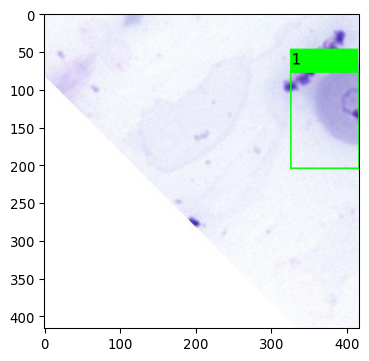

./malaria/images/train\pf-train-0000000027.jpg


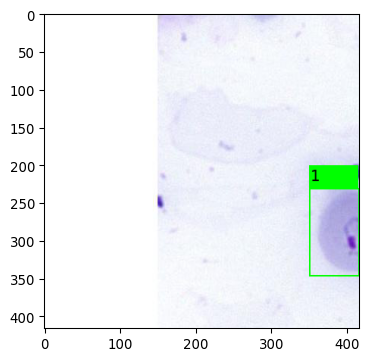

./malaria/images/train\pf-train-0000000028.jpg


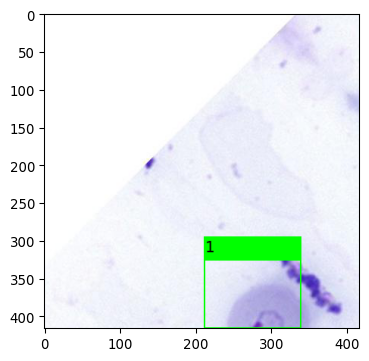

./malaria/images/train\pf-train-0000000029.jpg


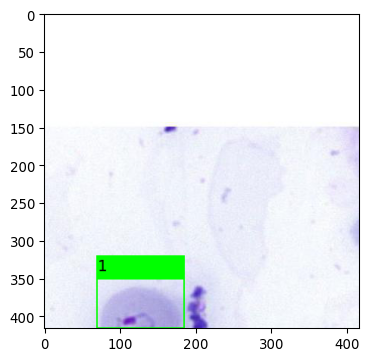

./malaria/images/train\pf-train-0000000030.jpg


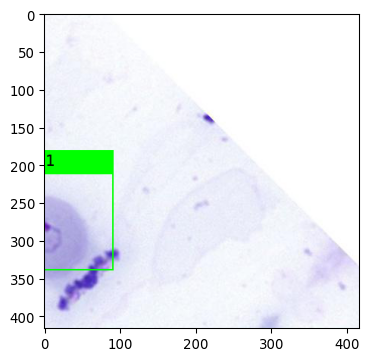

./malaria/images/train\pf-train-0000000031.jpg


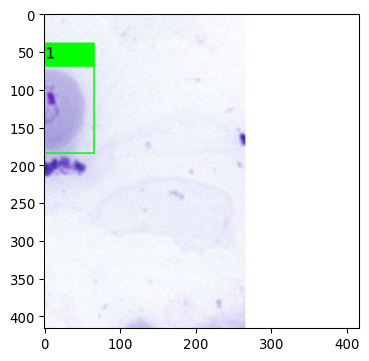

./malaria/images/train\pf-train-0000000032.jpg


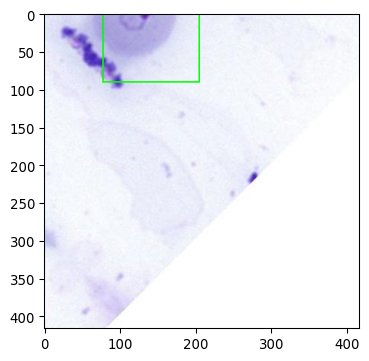

In [2]:
files = glob.glob("./malaria/images/train/*.jpg")

for file in files:
    rects = []
    img = Image.open(file)
    print(file)
    img = np.array(img)
    height,weigth,channel = img.shape
    f = open(file.replace("/images","/labels").replace(".jpg", ".txt"),"r")
    bboxs = list(f)
    f.close()
    for box in bboxs:
        coor = box.split()
        label = int(coor[0])
        xc = float(coor[1])*weigth
        yc = float(coor[2])*height
        bb_w = float(coor[3])
        bb_h = float(coor[4])
        w = bb_w*weigth
        h = bb_h*height
        x1 = xc-(w/2)
        y1 = yc-(h/2)
        x2 = x1 + bb_w*weigth
        y2 = y1 + bb_h*height
        # print([label,x1,y1,x2,y2])
        rects.append(BoundingBox(x1=x1,y1=y1,x2=x2,y2=y2,label=label))
    bbs = BoundingBoxesOnImage(rects,shape=img.shape)
    ia.imshow(bbs.draw_on_image(img, size=2))

In [3]:
# img_aug2 = Image.fromarray(img_box)
# draw = ImageDraw.Draw(img_aug2)
# for step in range(26,416,26):
#     print(step)
#     draw.line((step,0, step, 416), fill="red", width=3)
#     draw.line((0,step, 416, step), fill="red", width=3)
# img_aug2 = np.array(img_aug2)
# ia.imshow(img_aug2)
# ia.imshow(img_box)

In [6]:

files = glob.glob("./malaria/images/train/*.jpg")

for file in files:
    os.remove(file)
    os.remove(file.replace("/images","/labels").replace(".jpg", ".txt"))

In [4]:
# # f = open("data/custom/train.txt","r")
# # images = list(f)
# # f.close()
# # print(images[0])
# rects = []
# img = imread("data/custom/images/pf-train-0000020099.jpg")
# height,weigth,channel = img.shape

# f = open("data/custom/labels/pf-train-0000020099.txt","r")
# bboxs = list(f)
# # print(bboxs)
# f.close()
# for box in bboxs:
#     coor = box.split()
#     label = int(coor[0])
#     xc = float(coor[1])*weigth
#     yc = float(coor[2])*height
#     bb_w = float(coor[3])
#     bb_h = float(coor[4])
#     w = bb_w*weigth
#     h = bb_h*height
#     x1 = xc-(w/2)
#     y1 = yc-(h/2)
#     x2 = x1 + bb_w*weigth
#     y2 = y1 + bb_h*height
#     print([label,x1,y1,x2,y2])
#     rects.append(BoundingBox(x1=x1,y1=y1,x2=x2,y2=y2,label=label))
# bbs = BoundingBoxesOnImage(rects,shape=img.shape)
# # img_aug, bbs_aug = iaa.Fliplr()(image=img, bounding_boxes=bbs)
# # print(bbs)
# ia.imshow(bbs.draw_on_image(img, size=2))
# # ia.imshow(bbs_aug.draw_on_image(img_aug, size=2))